<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading

**Chapter 04 &mdash; Vectorized Backtesting**

## Strategies based on Momentum

### Getting into the Basics

In [59]:
import pandas as pd
import numpy as np

In [60]:
# data from http://hilpisch.com/pyalgo_eikon_eod_data.csv
raw = pd.read_csv('../input/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [61]:
data = pd.DataFrame(raw['XAU='])

In [62]:
data.rename(columns={'XAU=': 'price'}, inplace=True)

In [63]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [64]:
data['position'] = np.sign(data['returns'])

In [65]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [66]:
data

,price,returns,position,strategy
Date,,,,
2010-01-04,1120.0000,NaN,NaN,NaN
2010-01-05,1118.6500,-0.001206,-1.0,NaN
2010-01-06,1138.5000,0.017589,1.0,-0.017589
2010-01-07,1131.9000,-0.005814,-1.0,-0.005814
2010-01-08,1136.1000,0.003704,1.0,-0.003704
...,...,...,...,...
2019-12-24,1498.8100,0.009075,1.0,0.009075
2019-12-26,1511.2979,0.008297,1.0,0.008297
2019-12-27,1510.4167,-0.000583,-1.0,-0.000583


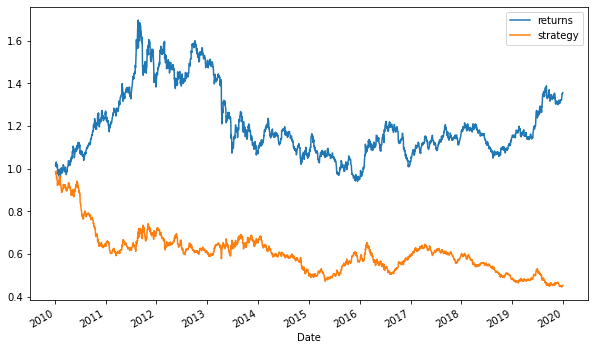

In [67]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch04/mom_plot_1.png')

In [68]:
data['position'] = np.sign(data['returns'].rolling(3).mean())

In [69]:
data['strategy'] = data['position'].shift(1) * data['returns']

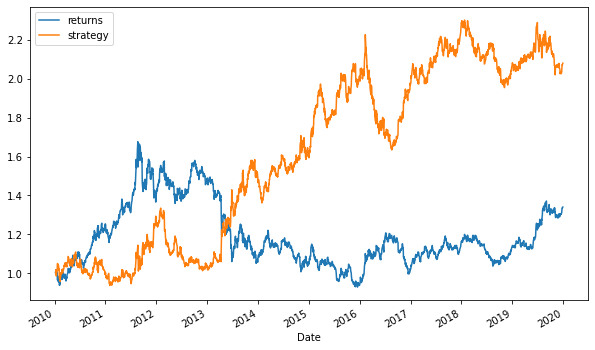

In [70]:
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6));
# plt.savefig('../../images/ch04/mom_plot_2.png')

#### Intraday Data from Eikon

In [71]:
fn = '../input/AAPL_1min_05052020.csv'

In [72]:
data = pd.read_csv(fn, index_col=0, parse_dates=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-05-05 16:00:00 to 2020-05-05 20:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    241 non-null    float64
 1   LOW     241 non-null    float64
 2   OPEN    241 non-null    float64
 3   CLOSE   241 non-null    float64
 4   COUNT   241 non-null    float64
 5   VOLUME  241 non-null    float64
dtypes: float64(6)
memory usage: 13.2 KB


In [74]:
data['returns'] = np.log(data['CLOSE'] / data['CLOSE'].shift(1))

In [75]:
to_plot = ['returns']

In [76]:
for m in [1, 3, 5, 7, 9]:
    data['position_%d' % m] = np.sign(data['returns'].rolling(m).mean())
    data['strategy_%d' % m] = (data['position_%d' % m].shift(1) * data['returns'])
    to_plot.append('strategy_%d' % m) 

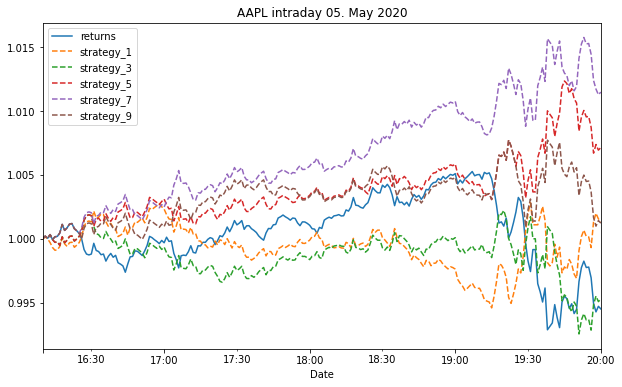

In [77]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='AAPL intraday 05. May 2020',
    figsize=(10, 6), 
    style=['-', '--', '--', '--', '--', '--']
);
# plt.savefig('../../images/ch04/mom_plot_4.png')
# plt.savefig('../../images/ch04/mom_plot_5.png')

### Generalizing the Approach

In [78]:
# Add "utils/" to the path to import some helper functions
import sys
sys.path.append('../utils')

In [79]:
import MomVectorBackTester as Mom

In [80]:
momentumBackTester = Mom.MomVectorBackTester('XAU=', '2010-1-1', '2019-12-31', 10000, 0.0)

In [81]:
momentumBackTester.run_strategy(momentum=3)

(20797.87, 7395.53)

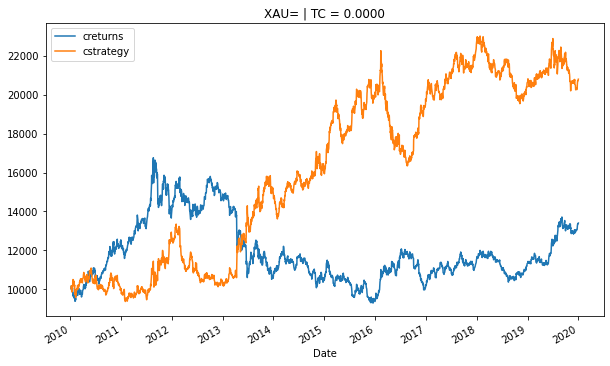

In [82]:
momentumBackTester.plot_results()
# plt.savefig('../../images/ch04/mom_plot_6.png')

In [83]:
momentumBackTester = Mom.MomVectorBackTester('XAU=', '2010-1-1', '2019-12-31', 10000, 0.001)

In [84]:
momentumBackTester.run_strategy(momentum=3)

(10749.4, -2652.93)

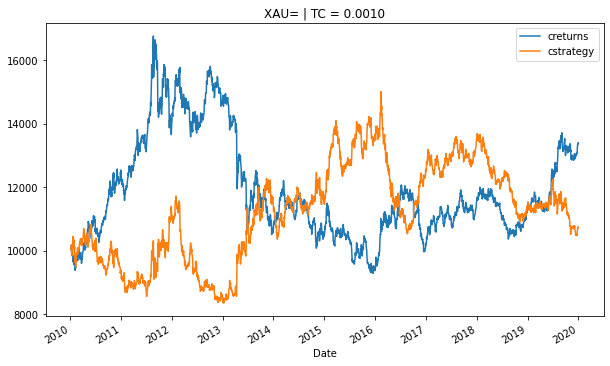

In [85]:
momentumBackTester.plot_results()
# plt.savefig('../../images/ch04/mom_plot_7.png')

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>